In [ ]:
import pandas
import matplotlib.pyplot as plt

students = pandas.read_csv('https://modcom.co.ke/data/datasets/school.csv')
students


,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021,7/18/1987,1-Aug-2011,08-May-2017,4.0,accounting,1.0,0,NaN,NaN,0.0,NaN,0:12:55,87.72,84.99,65.31,NaN,In state,0.0,1.0,18.0,1.0,10.0
431,40697,4/29/1987,1-Aug-2011,09-May-2016,4.0,NaN,0.0,0,68.50,131.92,0.0,9.125,0:08:33,91.01,86.87,70.25,82.67,In state,0.0,3.0,26.0,6.0,15.0
432,34272,NaN,1-Aug-2011,09-May-2016,4.0,nursing,0.0,1,68.10,130.07,0.0,NaN,NaN,81.05,85.76,58.16,81.87,NaN,0.0,3.0,29.0,6.0,10.0
433,33628,NaN,1-Aug-2011,08-May-2017,4.0,Nursing,1.0,1,69.27,157.26,2.0,6.905,0:08:26,75.59,85.97,66.84,79.35,In state,0.0,1.0,14.0,4.0,10.0


In [ ]:
print(students.isnull().sum())

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64


In [ ]:
# Fill empties   - categorical varibles
students['Rank'].fillna(5, inplace=True)
students['Gender'].fillna(2, inplace=True)
students['Major'].fillna('Unknown', inplace=True)
students['Smoking'].fillna(3, inplace=True)
# repeat to check if above have been filled

# Decode them 
students['Gender'].replace({0:'Male', 1:'Female',2:'Unknown'}, inplace=True)
students['Rank'].replace({1:'Freshmen', 2:'Sophomore',3:'Junior', 4:'Senior',5:'Unknown'}, inplace=True)
students['Smoking'].replace({0:'Non-Smoker', 1:'Past Smoker',2:'Current', 3:'Unknown'}, inplace=True)
students['Athlete'].replace({0:'Non-Athlete', 1: 'Athelete'}, inplace=True)

# For continous variables
mean_math = students['Math'].mean()
mean_reading = students['Reading'].mean()
mean_writing = students['Writing'].mean()

# fill empties
students['Math'].fillna(mean_math, inplace=True)
students['Reading'].fillna(mean_reading, inplace=True)
students['Writing'].fillna(mean_writing, inplace=True)

print(students.isnull().sum())

ids               0
bday              8
enrolldate       29
expgradate       29
Rank              0
Major             0
Gender            0
Athlete           0
Height           27
Weight           59
Smoking           0
Sprint           61
MileMinDur       43
English          26
Reading           0
Math              0
Writing           0
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64


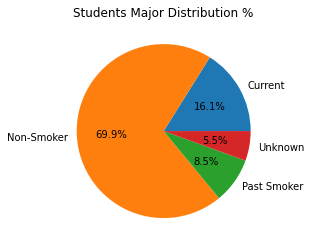

In [ ]:
import matplotlib.pyplot as plt

_, ax  = plt.subplots()
students.groupby("Smoking").size().plot(kind='pie', autopct='%1.1f%%')
ax.set_title("Students Major Distribution %")
ax.set_ylabel('')
plt.show()

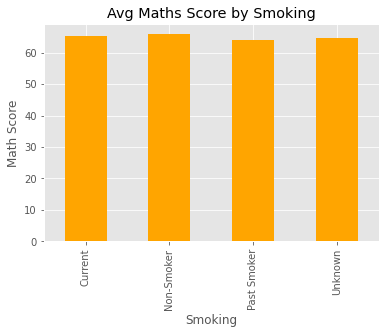

In [ ]:
plt.style.use('ggplot')
_, ax  = plt.subplots()
students.groupby("Smoking")['Math'].mean().plot(kind='bar', color = 'orange')
ax.set_title("Avg Maths Score by Smoking")
ax.set_ylabel('Math Score')
ax.set_xlabel('Smoking')

plt.show()

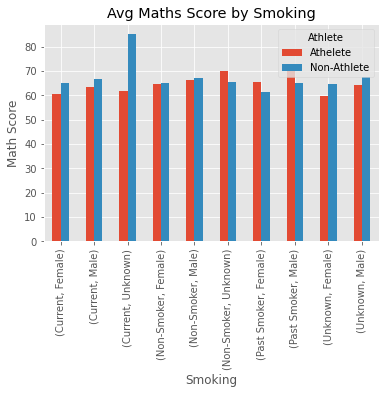

In [ ]:
plt.style.use('ggplot')
students.groupby(["Smoking","Gender","Athlete"])['Math'].mean().unstack().plot(kind='bar',
                                                                     stacked=False)
plt.title("Avg Maths Score by Smoking")
plt.ylabel('Math Score')
plt.xlabel('Smoking')

plt.show()

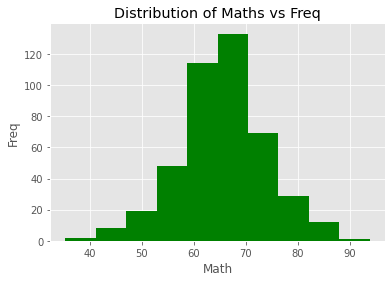

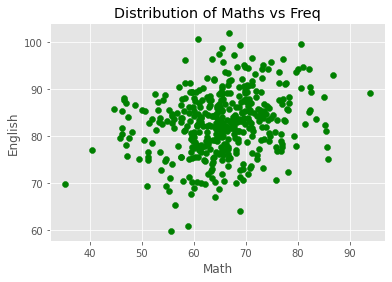

In [ ]:
plt.style.use('ggplot')
_, ax  = plt.subplots()
ax.hist(students['Math'], color = 'green')
ax.set_title("Distribution of Maths vs Freq")
ax.set_ylabel('Freq')
ax.set_xlabel('Math')
plt.show()
#  --------------------
plt.style.use('ggplot')
_, ax  = plt.subplots()
ax.scatter(students['Math'], students['English'], color = 'green')
ax.set_title("Distribution of Maths vs Freq")
ax.set_ylabel('English')
ax.set_xlabel('Math')
plt.show()


In [ ]:
#  Fill empties for SleepTime, StudyTime, HowCommute, Height, Weight, 
#  Create 5 more plots using the above fields

# Cluster the students by their performance 
# For Clustering use Reading, Math, Writing, English.
# Come up and explain 5 clusters

